# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Redes-Neurais" data-toc-modified-id="Redes-Neurais-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Redes Neurais</a></div><div class="lev2 toc-item"><a href="#Preâmbulo" data-toc-modified-id="Preâmbulo-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preâmbulo</a></div><div class="lev2 toc-item"><a href="#Arquitetura" data-toc-modified-id="Arquitetura-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Arquitetura</a></div><div class="lev3 toc-item"><a href="#Propagação-para-frente" data-toc-modified-id="Propagação-para-frente-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Propagação para frente</a></div><div class="lev3 toc-item"><a href="#Propagação-para-trás" data-toc-modified-id="Propagação-para-trás-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Propagação para trás</a></div><div class="lev2 toc-item"><a href="#Implementação-matricial" data-toc-modified-id="Implementação-matricial-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Implementação matricial</a></div><div class="lev3 toc-item"><a href="#Vetorização-do-algoritmo" data-toc-modified-id="Vetorização-do-algoritmo-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Vetorização do algoritmo</a></div><div class="lev3 toc-item"><a href="#O-código" data-toc-modified-id="O-código-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>O código</a></div><div class="lev3 toc-item"><a href="#Verificando-o-cálculo-do-gradiente" data-toc-modified-id="Verificando-o-cálculo-do-gradiente-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Verificando o cálculo do gradiente</a></div><div class="lev2 toc-item"><a href="#Testes" data-toc-modified-id="Testes-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Testes</a></div><div class="lev3 toc-item"><a href="#Dataset" data-toc-modified-id="Dataset-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Dataset</a></div><div class="lev3 toc-item"><a href="#Testando-nossa-implementação" data-toc-modified-id="Testando-nossa-implementação-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Testando nossa implementação</a></div><div class="lev3 toc-item"><a href="#Keras" data-toc-modified-id="Keras-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Keras</a></div>

# Redes Neurais
## Preâmbulo

In [26]:
%matplotlib inline
import matplotlib.pyplot as plot
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
from IPython.display import display

import time
import numpy as np
import numpy.random as nr
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, TensorBoard
from keras.utils import np_utils

np.set_printoptions(precision=2, linewidth=100, suppress=True)

## Arquitetura

<table align='left'>
<tr><td colspan=2> <img src="https://docs.google.com/drawings/d/1958hSDd7WX_ijgL9E-SMR3sgzLvBpmvD8AyEtwaxio8/pub?w=960&h=720" alt="Drawing" style="width: 960px;"/> </td></tr>
</table>

### Propagação para frente
<table align='left'>
<tr><td colspan=2> <img src="https://docs.google.com/drawings/d/10dhKHBLoALtQVCsq2dtzma01I0shyZsCT9pRd-adtSw/pub?w=960&h=720" alt="Drawing" style="width: 960px;"/> </td></tr>
</table>

\begin{align} 
\mathbf{a}_{(i)} & = \begin{cases}
\mathbf{x}  & \text{ if } i = 0 \\
\\
g(\mathbf{W}_{(i-1)} \cdot \mathbf{a}_{(i-1)}) & \text{ if } 1 \leq i \leq L  \text{ where } g(\mathbf{z}) = \frac{1}{1+e^{-\mathbf{z}}} \\
\end{cases}
\\
\mathbf{\hat{y}} & = \mathbf{a}_{L}
\\
J & = - \sum \left (\mathbf{y} \log{(\mathbf{\hat{y}})} + (1 - \mathbf{y}) \log{(1 - \mathbf{\hat{y}})} \right )
\end{align}


### Propagação para trás
<table align='left'>
<tr><td colspan=2> <img src="https://docs.google.com/drawings/d/1FkEaZpPSUFVybgeyrW-mBIzGQCvKEapjXIgts_rC3GE/pub?w=960&h=720" alt="Drawing" style="width: 960px;"/> </td></tr>
</table>

\begin{align} 
\boldsymbol{\delta}_{(i)} & = \begin{cases}
\mathbf{a}_{(i)} - \mathbf{y} & \text{ if } i = L \\
\\
\mathbf{W}_{(i+1)}^T \cdot \boldsymbol{\delta}_{(i+1)} \circ \mathbf{a}_{(i)} (1 - \mathbf{a}_{(i)}) & \text{ if } 1 \leq i \leq L-1 
\end{cases}
\\
\mathbf{\nabla}_{(i)} & = \boldsymbol{\delta}_{(i+1)} \cdot \mathbf{a}_{(i)}^{T}
\\
\mathbf{W}_{(i)} & = \mathbf{W}_{(i)} - \eta \mathbf{\nabla}_{(i)}
\end{align}

## Implementação matricial

### Vetorização do algoritmo

<table align='left'>
<tr>
<td colspan=2> 
<b>Forward</b>
<img src="https://docs.google.com/drawings/d/1gtCx1mmtt3pwlJwZaWOGW_OQ8sBttftRwH9uVmNPHaY/pub?w=960&h=720" alt="Drawing" style="width: 960px;"/> 
</td>

<td colspan=2> 
<b>Backward</b>
<img src="https://docs.google.com/drawings/d/1C3HOnRX9bSnsvHlyWJo9pEirXE_4ms8RJWtaqMYGpQw/pub?w=960&h=720" alt="Drawing" style="width: 960px;"/> 
</td>

</tr>
</table>


### O código

In [40]:
class BackPropNeuralNetwork:
    
    def __init__(self, layer_sizes=[], is_classifier=True):
        self.L = len(layer_sizes)
        self.s = layer_sizes
        self.W = None
        self.classifier = is_classifier
        self.costs = []

    def init_weights(self, epsilon=None):
        from numpy.random import rand
        self.W = []
        for i in range(self.L-1):
            if epsilon == 0:
                self.W.append(np.zeros((self.s[i+1], self.s[i]+1), np.float))
            else:
                # Glorot Uniform or uniform with epsilon
                eps = epsilon or np.sqrt(6.0 / (self.s[i] + self.s[i+1]))
                self.W.append(2*eps*rand(self.s[i+1], self.s[i]+1) - eps)
            
    def predict(self, X):
        a = self.compute_activations(self.W, X)
        return a[-1]
    
    def evaluate(self, X, y):
        a = self.compute_activations(self.W, X)
        cost = self.compute_cost(a[-1], y)
        return cost
    
    def compute_cost_and_gradient(self, W, X, y):
        M, N  = X.shape
        G = [None for n in self.s[:-1]]
        # Forward propagation
        a = self.compute_activations(W, X)
        # Cost computation
        J = self.compute_cost(a[-1], y)
        # Back propagation
        d = self.compute_errors(W, a, y)
        # Gradients computation
        for j in range(self.L-1):
            G[j] = np.dot(d[j+1].T, a[j]) / M                  # eq. 5
        return J, G

    def compute_cost(self, y_pred, y_true):
        if self.classifier:
            # classifier: binary cross-entropy                 # eq. 3
            J = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).sum() / y_true.shape[0]
        else:
            # regressor: mean squared error
            J = 0.5 * np.square(y_pred - y_true).sum() / y_true.shape[0]
        return J
    
    def compute_activations(self, W, X):
        a = [None for n in self.s]
        a[0] = X                                               # eq. 1
        for j in range(1, self.L):
            a[j-1] = np.insert(a[j-1], 0, 1, 1)
            z = np.dot(a[j-1], W[j-1].T)                       # eq. 1
            if j == self.L-1 and not self.classifier:
                a[j] = z
            else:
                a[j] = self._logistic(z)                       # eq. 1
        return a            

    def compute_errors(self, W, a, y):
        d = [None for n in self.s]
        d[-1] = a[-1] - y                                      # eq. 4
        for j in range(self.L-2, 0, -1):
            d[j] = np.dot(d[j+1], W[j]) * a[j] * (1 - a[j])    # eq. 4
            d[j] = d[j][:,1:]
        return d

    def sgd(self, X, y, eta, batch, n_epochs, Xval=None, yval=None, verbose=0):
        m, n = X.shape
        n_batches = int(np.ceil(m / batch))
        for epoch in range(n_epochs):
            for ii in range(n_batches):
                kk = batch * ii
                X_batch, y_batch = X[kk:kk+batch], y[kk:kk+batch]
                
                cost, G = self.compute_cost_and_gradient(self.W, X, y)
                for i in range(len(self.W)):
                    self.W[i] -= eta * G[i]
                                
            if Xval is not None:
                cost_val = self.evaluate(Xval, yval)
                self.costs.append((epoch, cost, cost_val))
                if (verbose > 0) and (not epoch % verbose):
                    print(('{:4d} Training Cost: {:.5f}    Validation Cost: {:.5f}'.format(epoch, cost, cost_val)))
            else:
                self.costs.append((epoch, cost, 0))
                if (verbose > 0) and (not epoch % verbose):
                    print(('{:4d} Training Cost: {:.5f}'.format(epoch, cost)))

        return self.costs

    @staticmethod
    def _logistic(z):
        z = np.asarray(z)
        z = np.minimum(z,  15)
        z = np.maximum(z, -15)
        return np.ones(z.shape)/(1.0 + np.exp(-z))


### Verificando o cálculo do gradiente

Para fazer uma verificação numérica da correção de nossa implementação concatenamos cada matriz $W^{(L)}$ de forma a criar um vetor $\theta$ que contenha todos os pesos (e bias) de nossa rede neural.

Para calcular o gradiente, para cada elemento do vetor $\theta$ fazemos


$$
\theta^{(i+)} = \theta + \begin{bmatrix}
0 \\
0\\ 
\vdots \\ 
\epsilon \\ 
\vdots \\ 
0
\end{bmatrix} \; \; \; \; \; \; \text{ e }  \; \; \; \theta^{(i-)} = \theta - \begin{bmatrix}
0 \\
0\\ 
\vdots \\ 
\epsilon \\ 
\vdots \\ 
0
\end{bmatrix}
$$

Uma aproximação para o gradiente é dada por:

$$
\frac{\partial }{\partial \theta_i} J(\theta) \approx \frac{J(\theta^{(i+)}) - J(\theta^{(i-)})}{2 \epsilon}
$$

In [42]:
def compute_approx_gradient(nnet, W, X, y, eps=0.0001):
    def roll(thetas, W=W):
        Theta, m = [], 0
        for h, w in [t.shape for t in W]:
            Theta.append(thetas[m:m + h*w].reshape((h,w)))
            m += h*w
        return Theta
    
    thetas = np.concatenate([t.flat for t in W])
    agrads = np.zeros_like(thetas)
    for i in range(thetas.shape[0]):
        t_plus = thetas.copy()
        t_plus[i] += eps            
        a_plus = nnet.compute_activations(roll(t_plus), X)
        J_plus = nnet.compute_cost(a_plus[-1], y)

        t_minus = thetas.copy()
        t_minus[i] -= eps
        a_minus = nnet.compute_activations(roll(t_minus), X)
        J_minus = nnet.compute_cost(a_minus[-1], y)

        agrads[i] = (J_plus - J_minus) / (2*eps)

    return agrads

def gradient_check(classif):
    nn = BackPropNeuralNetwork([4, 5, 3], is_classifier=classif)
    nn.init_weights()
    
    X = np.sin(np.arange(32)).reshape((8, 4)) / 10
    y = np.zeros((8, 3))
    for i, k in enumerate(np.mod(np.arange(8), 3)):
        y[i,k] = 1.0
    
    agrad = compute_approx_gradient(nn, nn.W, X, y)
    J, G = nn.compute_cost_and_gradient(nn.W, X, y)
    grad = np.concatenate([t.flat for t in G])
    return np.allclose(agrad, grad)

print('Classificador:', ['Error', 'OK'][gradient_check(True)])
print('Regressor:    ', ['Error', 'OK'][gradient_check(True)])

Classificador: OK
Regressor:     OK


## Testes

### Dataset

In [29]:
# -----------------------------------------------------------------------------------------------------------
# Boston Housing Data Set
# -----------------------
# [https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
#
# 1. Title: Boston Housing Data
# 
# 2. Sources:
#    (a) Origin:  This dataset was taken from the StatLib library which is
#                 maintained at Carnegie Mellon University.
#    (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
#                  demand for clean air', J. Environ. Economics & Management,
#                  vol.5, 81-102, 1978.
#    (c) Date: July 7, 1993
# 
# 3. Past Usage:
#    -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
#        1980.   N.B. Various transformations are used in the table on
#        pages 244-261.
#     -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
#        In Proceedings on the Tenth International Conference of Machine 
#        Learning, 236-243, University of Massachusetts, Amherst. Morgan
#        Kaufmann.
# 
# 4. Relevant Information:
# 
#    Concerns housing values in suburbs of Boston.
# 
# 5. Number of Instances: 506
# 
# 6. Number of Attributes: 13 continuous attributes (including "class"
#                          attribute "MEDV"), 1 binary-valued attribute.
# 
# 7. Attribute Information:
# 
#     1. CRIM      per capita crime rate by town
#     2. ZN        proportion of residential land zoned for lots over 
#                  25,000 sq.ft.
#     3. INDUS     proportion of non-retail business acres per town
#     4. CHAS      Charles River dummy variable (= 1 if tract bounds 
#                  river; 0 otherwise)
#     5. NOX       nitric oxides concentration (parts per 10 million)
#     6. RM        average number of rooms per dwelling
#     7. AGE       proportion of owner-occupied units built prior to 1940
#     8. DIS       weighted distances to five Boston employment centres
#     9. RAD       index of accessibility to radial highways
#     10. TAX      full-value property-tax rate per $10,000
#     11. PTRATIO  pupil-teacher ratio by town
#     12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#     13. LSTAT    % lower status of the population
#
#     14. MEDV     Median value of owner-occupied homes in $1000's
# 
# 8. Missing Attribute Values:  None.
# -----------------------------------------------------------------------------------------------------------
from keras.datasets import boston_housing
(Xtra, ytra), (Xval, yval) = boston_housing.load_data()

Xpd, ypd = pd.DataFrame(Xtra), pd.DataFrame(ytra)
display(Xpd.head())
display(ypd.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


,0
0,18.72
1,3.11
2,3.26
3,8.01
4,14.65


In [30]:
print(Xtra[:5,-1], Xtra.dtype)
print(ytra[:5], ytra.dtype)

[ 18.72   3.11   3.26   8.01  14.65] float64
[ 18.72   3.11   3.26   8.01  14.65] float64


In [31]:
Xtra, Xval = Xtra[:,:-1].astype(np.float32), Xval[:,:-1].astype(np.float32)
ytra, yval = ytra.reshape(-1, 1).astype(np.float32), yval.reshape(-1, 1).astype(np.float32)

mean = Xtra.mean(0)
Xtra -= mean
std = Xtra.std(0)
Xtra /= std

Xval -= mean
Xval /= std

m, n = Xtra.shape
print('Shapes:', Xtra.shape, Xval.shape, Xtra.dtype, ytra.shape, yval.shape)
print('Data: min={:.3f}, mean={:.3f}, max={:.3f}, std={:.3f}'.format(Xtra.min(), Xtra.mean(), Xtra.max(), Xtra.std()))
print('Target: min={:.3f}, mean={:.3f}, max={:.3f}, std={:.3f}'.format(ytra.min(), ytra.mean(), ytra.max(), ytra.std()))


Shapes: (404, 12) (102, 12) float32 (404, 1) (102, 1)
Data: min=-3.817, mean=-0.000, max=9.235, std=1.000
Target: min=1.730, mean=12.741, max=37.970, std=7.246


\begin{align*} 
\mathbf{X}_{train} & = \begin{bmatrix}
\longleftarrow & (\mathbf{x}^{(0)})^T & \longrightarrow \\ 
\longleftarrow & (\mathbf{x}^{(1)})^T & \longrightarrow \\ 
  & \vdots  & \\ 
\longleftarrow & (\mathbf{x}^{(m-1)})^T & \longrightarrow 
\end{bmatrix} = \begin{bmatrix}
x_0^{(0)} & x_1^{(0)} & x_2^{(0)} & \ldots & x_{12}^{(0)} \\
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \ldots & x_{12}^{(1)} \\
 &  & \vdots  & \\ 
x_0^{(403)} & x_1^{(403)} & x_2^{(403)} & \ldots & x_{12}^{(403)}
\end{bmatrix} \\
\\
\mathbf{y}_{train} & = \begin{bmatrix}
y^{(0)} \\
y^{(1)} \\
\vdots  \\ 
y^{(403)} \\
\end{bmatrix}
\end{align*}


### Testando nossa implementação

In [32]:
layer_sizes = [n, 40, 20, 1]
n_epochs = 1000

nnet = BackPropNeuralNetwork(layer_sizes, is_classifier=False)
nnet.init_weights(epsilon=0)

print('-'*60)
print('Tuneable parameters: {}'.format(sum([w.size for w in nnet.W])))
print('-'*60)

try:
    t1 = t0 = time.time()
    costs = nnet.sgd(Xtra, ytra, 0.05, 404, n_epochs, Xval=Xval, yval=yval, verbose=n_epochs/10)
    t1 = time.time()
except KeyboardInterrupt:
    pass

print('\nTrained in {:2f}s'.format(t1-t0))
yhat = nnet.predict(Xval)
mse = np.square(yhat - yval).mean()
print('\nMSE:', mse)
print()
print('y_hat', yhat[:10,0])
print('y_val', yval[:10,0])
print()


------------------------------------------------------------
Tuneable parameters: 1361
------------------------------------------------------------
   0 Training Cost: 107.41328    Validation Cost: 58.17717
 100 Training Cost: 12.37980    Validation Cost: 10.13185
 200 Training Cost: 9.74884    Validation Cost: 6.88184
 300 Training Cost: 8.76111    Validation Cost: 5.50112
 400 Training Cost: 8.61781    Validation Cost: 5.20915
 500 Training Cost: 8.55849    Validation Cost: 5.09967
 600 Training Cost: 8.51982    Validation Cost: 5.06126
 700 Training Cost: 8.49130    Validation Cost: 5.05456
 800 Training Cost: 8.46936    Validation Cost: 5.06054
 900 Training Cost: 8.45230    Validation Cost: 5.07075

Trained in 2.300952s

MSE: 10.1634749283

y_hat [ 22.59  15.4   10.25  14.07  10.19   9.71   5.04   9.29  17.3   11.48]
y_val [ 29.05  16.21   9.74   5.5    8.44  13.59   4.61   7.51  17.93  14.36]



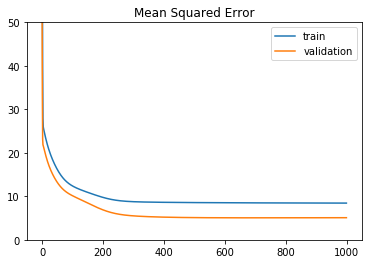

In [33]:
plot.plot([c1 for i, c1, c2 in costs], label='train')
plot.plot([c2 for i, c1, c2 in costs], label='validation')
plot.ylim(0, 50.)
plot.legend()
plot.title('Mean Squared Error');


### Keras

In [38]:
estop = EarlyStopping(patience=200, verbose=1)

def build():  
    model = Sequential()
    model.add(Dense(layer_sizes[1], activation='sigmoid', input_dim=layer_sizes[0], kernel_initializer='zeros'))
    model.add(Dense(layer_sizes[2], activation='sigmoid', kernel_initializer='zeros'))
    model.add(Dense(layer_sizes[3], activation='linear', kernel_initializer='zeros'))
    return model

nnet = build()
nnet.summary()

opt = SGD(lr=0.1)
nnet.compile(loss="mse", optimizer=opt, metrics=['mae'])

try:
    t0 = time.time()
    histo2 = nnet.fit(Xtra, ytra, batch_size=404, epochs=n_epochs, verbose=0, shuffle=False,
                      validation_data=(Xval, yval), callbacks=[estop])
    t1 = time.time()
except KeyboardInterrupt:
    pass

print('\nTrained in {:2f}s'.format(t1-t0))
print()
yhat = nnet.predict(Xval, verbose=0)
mse = np.square(yhat - yval).mean()
print('MSE:', mse)
print()
print('y_hat', yhat[:10,0])
print('y_val', yval[:10,0])
print()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 40)                520       
_________________________________________________________________
dense_11 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________
Epoch 00273: early stopping

Trained in 1.346914s

MSE: 10.1243

y_hat [ 22.25  15.08   9.95  13.71   9.78   9.36   5.06   8.85  17.04  11.25]
y_val [ 29.05  16.21   9.74   5.5    8.44  13.59   4.61   7.51  17.93  14.36]



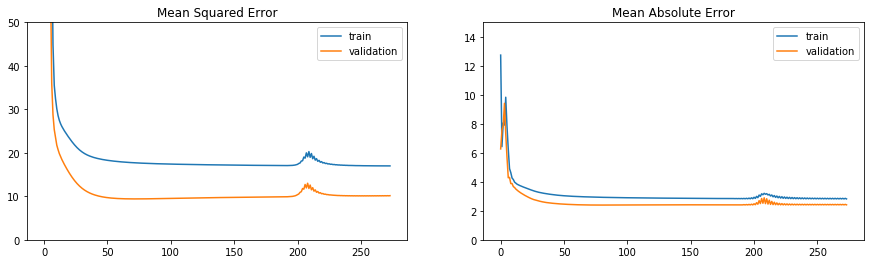

In [35]:
fig = plot.figure(figsize=(15,4))

fig.add_subplot(121)
plot.plot(histo2.history['loss'], label='train')
plot.plot(histo2.history['val_loss'], label='validation')
plot.ylim(0, 50)
plot.legend()
plot.title('Mean Squared Error');

fig.add_subplot(122)
plot.plot(histo2.history['mean_absolute_error'], label='train')
plot.plot(histo2.history['val_mean_absolute_error'], label='validation')
plot.ylim(0, 15)
plot.legend()
plot.title('Mean Absolute Error');


In [36]:
print(histo2.history['val_loss'][-5:])
print([2*c2 for i, c1, c2 in costs][-5:])

[10.138143539428711, 10.11146354675293, 10.142606735229492, 10.115581512451172, 10.147483825683594]
[10.162589027223806, 10.162810591986698, 10.163032097814861, 10.163253543608894, 10.16347492828387]
